<a href="https://colab.research.google.com/github/coddingyun/pytorch/blob/main/RAMI_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment2

20201253 GayunIm

In [ ]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
import random
torch.manual_seed(1)

In [ ]:
# MNIST dataset
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
# dataset loader
data_loader = DataLoader(dataset=mnist_train,
                                          batch_size=256,
                                          shuffle=True,
                                          drop_last=True)

In [ ]:
# MNIST data image of shape 28 * 28 = 784
linear = nn.Linear(784, 10, bias=True)


In [ ]:
# 비용 함수와 옵티마이저 정의
criterion = nn.CrossEntropyLoss()# 내부적으로 소프트맥스 함수를 포함하고 있음.
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)

In [ ]:
for epoch in range(20):
    avg_cost = 0
    total_batch = len(data_loader)

    for X, Y in data_loader:
        X = X.view(-1, 28 * 28)
        
        optimizer.zero_grad()
        hypothesis = linear(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

Epoch: 0001 cost = 0.709194005
Epoch: 0002 cost = 0.429301918
Epoch: 0003 cost = 0.383790553
Epoch: 0004 cost = 0.360257208
Epoch: 0005 cost = 0.346133679
Epoch: 0006 cost = 0.335446328
Epoch: 0007 cost = 0.327648103
Epoch: 0008 cost = 0.321485996
Epoch: 0009 cost = 0.316312492
Epoch: 0010 cost = 0.311800361
Epoch: 0011 cost = 0.308163136
Epoch: 0012 cost = 0.305078268
Epoch: 0013 cost = 0.302164108
Epoch: 0014 cost = 0.299557686
Epoch: 0015 cost = 0.297160238
Epoch: 0016 cost = 0.295040846
Epoch: 0017 cost = 0.293321311
Epoch: 0018 cost = 0.291284949
Epoch: 0019 cost = 0.289769292
Epoch: 0020 cost = 0.288330406
Learning finished


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

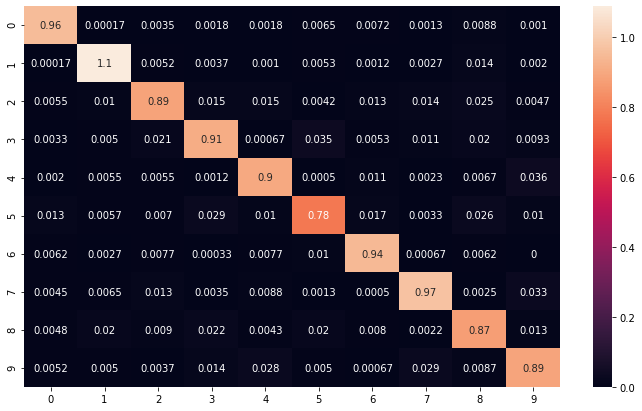

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import numpy as np

y_pred = []
y_true = []

# iterate over test data
for inputs, labels in data_loader:
  inputs = inputs.view(-1, 28 * 28)
  output = linear(inputs) # Feed Network

  output = (torch.max(torch.exp(output), 1)[1]).data.cpu().numpy()
  y_pred.extend(output) # Save Prediction
        
  labels = labels.data.cpu().numpy()
  y_true.extend(labels) # Save Truth

# constant for classes
classes = ('0', '1', '2', '3', '4',
        '5', '6', '7', '8', '9')

# Build confusion matrix
cf_matrix = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf_matrix/np.sum(cf_matrix)*10, index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True)
plt.savefig('output.png')

In [ ]:
# Accuracy 수치 check (TA 추가)
right = 0
for i in range(10):
    right += cf_matrix[i][i]
print("Accuracy: {:.4f}%".format(right/np.sum(cf_matrix)))

Accuracy: 0.9208%


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:67: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:57: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


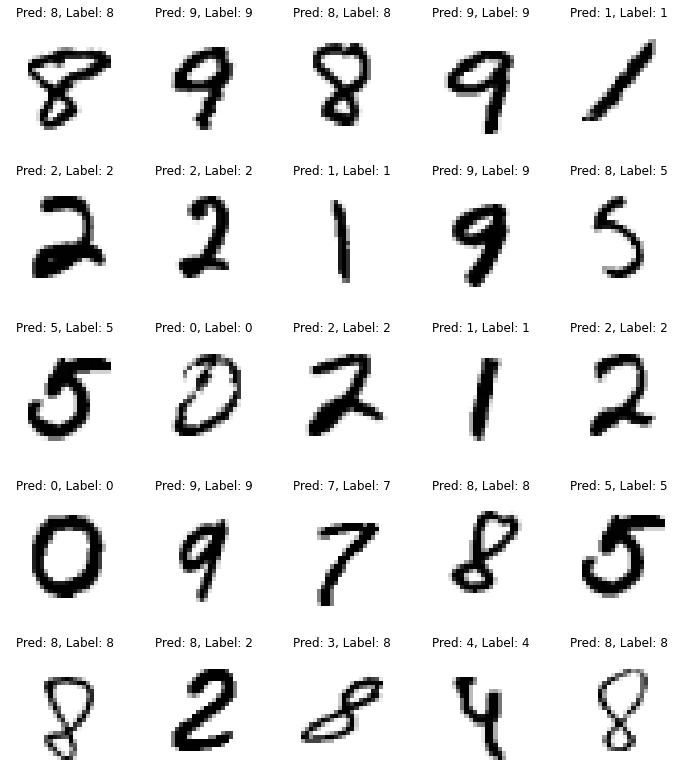

In [ ]:
# 테스트 데이터를 사용하여 모델을 테스트한다.
with torch.no_grad(): # torch.no_grad()를 하면 gradient 계산을 수행하지 않는다.
    fig, axis = plt.subplots(5, 5, figsize=(12, 14))
    for i, ax in enumerate(axis.flat):
      r = random.randint(0, len(mnist_test) - 1)
      X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float()
      Y_single_data = mnist_test.test_labels[r:r + 1]
      prediction = linear(X_single_data)
      correct_prediction = torch.argmax(prediction, 1) == mnist_test

      ax.axis('off')
      ax.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='binary')
      ax.set(title = f"Pred: {prediction.argmax()}, Label: {Y_single_data.item()}");